# <font color="darkblue"> Prática 01: Perceptron Learning Algorithm (PLA) </font>




**Objetivos:**


*   Entender o funcionamento do PLA e dos componentes de aprendizagem.
*   Fixar o conceito de aprendizagem.



**Descrição:**

Crie uma dataset $D$ com 1000 pontos e uma função alvo $f$ para compreender o funcionamento do PLA. Para visualizar os passos do algoritmo, considere $d=2$ e assuma $X=[-1,1]\times[-1,1]$, em que $x\in X$ é escolhido com probabilidade uniforme. Escolha uma reta como função alvo, em que um lado da reta seja mapeado para $+1$ e o outro para $-1$. Gere então pontos aleatórios $x_i$ e obtenha sua classificação $y_i$ a partir da função alvo. Divida os dados em um grupo de treinamento e outro de teste.

Após a preparação dos dados, crie uma função $PLA()$ que inicia com os pesos todos iguais a zero e, a cada iteração, deixe o algoritmo escolher aleatoriamente um dos pontos com classificação incorreta até que ele convirja. Rode o PLA sobre amostras com $N=10$ e $N=100$, teste a hipótese solução a partir de pontos diferentes (conjunto de teste) daqueles das amostras e responda a seguinte questão:

- Qual o percentual de pontos classificados corretamente para cada hipótese solução?










# <font color="darkblue"> Solução </font>


###  Preparação dos dos dados

O objetivo da prepação dos dados é a criação da função alvo e do dataset conforme a descrição do problema. Para tanto, você deve realizar os seguintes passos:

* Crie a função alvo (uma reta) a partir de dois pontos gerados aleatoriamente;
* Calcule o coeficiente angular e o coeficiente linear (bias) e os armazene em variáveis distintas;
* Gere aleatoriamente 1000 pontos, cujas coordenadas estão no intervalo $[-1,1]$, e os adicione em uma lista $X$ correspondendo aos dados da amostra;
* Para cada ponto gerado, use a função sign() de numpy, que recebe como entrada uma reta (função alvo), para obter a classificação de cada ponto. Adicione cada classificação em uma lista $y$.


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

# Crie a funcao alvo e o dataset

def generate_data(N):
    X = np.random.uniform(-1, 1, (N, 2))  # Gerando pontos aleatórios


    # Criando a função alvo (uma reta aleatória)
    p1, p2 = np.random.uniform(-1, 1, (2, 2))  # Dois pontos aleatórios para a reta
    m = (p2[1] -  p1[1]) / (p2[0] - p1[0])  # Inclinação da reta
    b = p1[1] - m * p1[0]  # Intercepto da reta

    # Função alvo f: classifica os pontos com base na reta
    def target_function(x):
        return np.sign(x[1] - (m * x[0] + b))  # Classifica como +1 ou -1

    Y = np.array([target_function(x) for x in X])
    return X, Y, p1, p2, m, b


### Visualizando o dataset
Use a função abaixo para visualizar o dataset criado anteriormente.

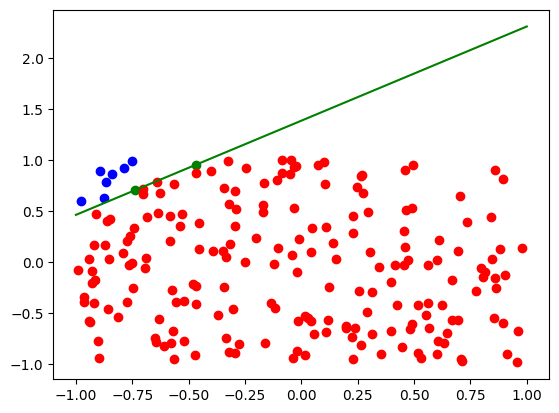

In [27]:
# Função para exibir o dataset
def show_dataset(X, y, p1, p2, m, b):
    line = np.linspace(-1, 1, 1000)
    plt.plot(line, m * line + b, label="f(x)", c="green")

    # Pontos usados na criação da reta
    plt.scatter(p1[0], p1[1], c='green')
    plt.scatter(p2[0], p2[1], c='green')

    # Plotando os pontos
    for i in range(len(X[:200])):
        if y[i] == 1:
            plt.scatter(X[i][0], X[i][1], c='blue')
        else:
            plt.scatter(X[i][0], X[i][1], c='red')

    plt.show()

# Gerando os dados e visualizando o gráfico
N = 1000
X, Y, p1, p2, m, b = generate_data(N)
show_dataset(X, Y, p1, p2, m, b)

In [28]:
%matplotlib inline
def plot_grafico(X, y, w, f):
    """
    Esta função objetiva a visualização dos passos do PLA.

    Paramêtros:
    - X (list[]): Matriz correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - w (list): Lista correspondendo aos pesos do perceptron.
    - f (list): Lista de dois elementos correspondendo, respectivamente, aos coeficientes angular e linear
    da função alvo.
    """

    nPontos = len(X)
    #matplotlib.use('TkAgg')

    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')

    plt.axis([-1, 1, -1, 1])

    x_plt = [X[i][0] for i in range(nPontos)]
    y_plt = [X[i][1] for i in range(nPontos)]

    for i in range(nPontos):
        if (y[i] == 1):
            plt.scatter(x_plt[i], y_plt[i], s=10, c='blue')
        else:
            plt.scatter(x_plt[i], y_plt[i], s=10, c='red')

    x = np.linspace(-1, 1, 1000)
    plt.plot(x, f[0]*x + f[1], c='green') # f[0] = m, f[1] = b
    plt.plot(x, (-w[0] - w[1]*x) / w[2], c='orange') # A*x + B*y + C => y = (-C - A*x) / B
    clear_output(wait=True)
    plt.show(block=False)
    plt.pause(0.01)


### Algoritmo PLA
Complete a função PLA() abaixo para implementar o Algoritmo de Aprendizagem do Perceptron conforme os slides da aula de "Significado de aprendizagem".

### Função para visualização dos passos do PLA
A função abaixo é uma função auxiliar que permite que vocês enxerguem o resultado de cada iteração da função PLA().

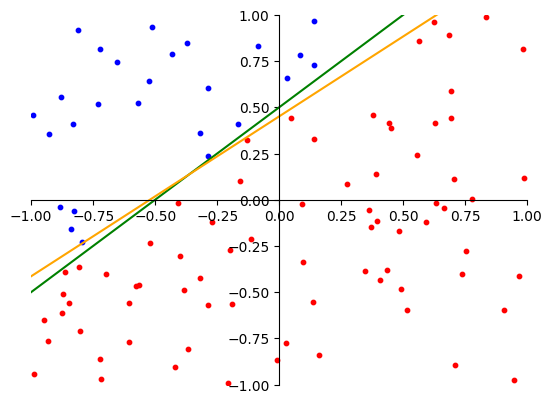

Convergiu em 97 iterações.
Pesos finais: [-3.         -5.75563477  6.65347742]


In [30]:
# Função PLA
def PLA(X, y, f):
    # Inicializar os pesos com zero
    w = np.zeros(3)  # w = [bias, peso_x1, peso_x2]
    it = 0
    while True:
        listaPCI = []

        # Verificar os pontos classificados incorretamente
        for i in range(len(X)):
            if y[i] != np.sign(w[0] + w[1]*X[i][0] + w[2]*X[i][1]):
                listaPCI.append(i)

        # Se não houver mais pontos incorretos, o algoritmo convergiu
        if len(listaPCI) == 0:
            break

        # Escolher um ponto incorreto aleatoriamente e atualizar os pesos
        i = np.random.choice(listaPCI)
        w[0] += y[i]  # Atualizar bias
        w[1] += y[i] * X[i][0]  # Atualizar peso de x1
        w[2] += y[i] * X[i][1]  # Atualizar peso de x2

        # Plotar o gráfico para visualizar os passos
        plot_grafico(X, y, w, f)

        it += 1  # Contar iterações

    return it, w


# Geração do Dataset e Função Alvo
N = 100
X = np.random.uniform(-1, 1, (N, 2))
p1 = np.array([-1, -0.5])
p2 = np.array([0.5, 1])
m = (p2[1] - p1[1]) / (p2[0] - p1[0])
b = p1[1] - m * p1[0]
f = [m, b]

# Classificar os pontos com base na função alvo
y = np.sign(X[:, 1] - (m * X[:, 0] + b))


it, w = PLA(X, y, f)

print(f"Convergiu em {it} iterações.")
print(f"Pesos finais: {w}")


### Função para construir lista de pontos classificados incorretamente
Implemente a função abaixo para contruir a lista de pontos classificados incorretamente em cada iteração do loop principal da função PLA().


In [32]:
def constroiListaPCI(X, y, w):
    """
    Esta função constrói a lista de pontos classificados incorretamente.

    Parâmetros:
    - X (list[]): Matriz correspondente aos dados amostrais. Cada elemento de X é uma lista que corresponde
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - w (list): Lista correspondente aos pesos do perceptron.

    Retorno:
    - l (list): Lista com os índices dos pontos classificados incorretamente.
    - new_y (list): Nova classificação desses pontos com base nos pesos atuais.
    """

    l = []
    new_y = []

    for i in range(len(X)):
        predicao = np.sign(w[0] + w[1] * X[i][0] + w[2] * X[i][1])

        # Se a predição for diferente da classificação verdadeira, o ponto está incorreto
        if predicao != y[i]:
            l.append(i)
            new_y.append(predicao)

    return l, new_y


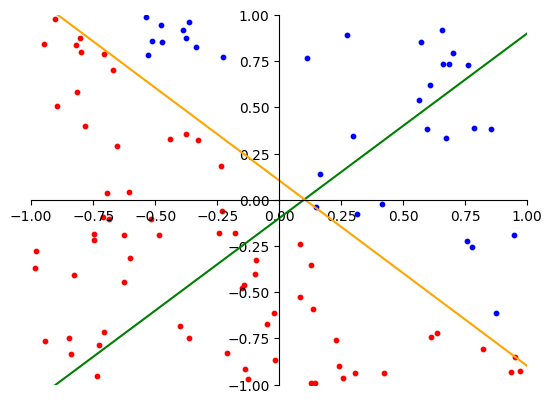

Iterações: 203
Pesos finais: [-1.0, 9.642987962801955, 9.607710316075002]


In [33]:
def PLA(X, y, f):
    # Inicializando os pesos com zero
    w = [0, 0, 0]
    it = 0

    while True:
        listaPCI, _ = constroiListaPCI(X, y, w)

        if len(listaPCI) == 0:
            break


        ponto_escolhido = np.random.choice(listaPCI)

        w[0] += y[ponto_escolhido]
        w[1] += y[ponto_escolhido] * X[ponto_escolhido][0]
        w[2] += y[ponto_escolhido] * X[ponto_escolhido][1]


        plot_grafico(X, y, w, f)

        it += 1

    return it, w



N = 100  # Número de pontos
X = np.random.uniform(-1, 1, (N, 2))
y = np.sign(X[:, 0] + X[:, 1] - 0.1)  # Exemplo de função alvo simples
f = [1, -0.1]  # Coeficientes da reta função alvo

# Executa o algoritmo PLA
it, w = PLA(X, y, f)

print(f'Iterações: {it}')
print(f'Pesos finais: {w}')

### Calculando a acurácia

Treine o Modelo de Aprendizagem de Máquina Perceptron com subamostras de tamanhos $N=10$ e $N = 100$, conforme o enunciado, e em seguida verifique a acurácia do modelo com uma subamostra de teste que contém pontos diferentes das subamostras utilizadas para treinamento.

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Função PLA já definida anteriormente
def PLA(X, y, f):
    w = [0, 0, 0]  # Inicialização dos pesos
    it = 0  # Contador de iterações

    while True:
        listaPCI, _ = constroiListaPCI(X, y, w)

        if len(listaPCI) == 0:  # Algoritmo converge quando não há mais pontos incorretos
            break

        ponto_escolhido = np.random.choice(listaPCI)
        w[0] += y[ponto_escolhido]
        w[1] += y[ponto_escolhido] * X[ponto_escolhido][0]
        w[2] += y[ponto_escolhido] * X[ponto_escolhido][1]

        it += 1

    return it, w

# Função para calcular a acurácia
def calcula_acuracia(X, y, w):
    acertos = 0
    for i in range(len(X)):
        predicao = np.sign(w[0] + w[1] * X[i][0] + w[2] * X[i][1])
        if predicao == y[i]:
            acertos += 1
    return acertos / len(X)  # Acurácia

# Gerando os dados
def gera_dados(N):
    X = np.random.uniform(-1, 1, (N, 2))
    y = np.sign(X[:, 0] + X[:, 1] - 0.1)  # Função alvo simples
    return X, y

# Treinando o modelo com N=10 e N=100
for N in [10, 100]:
    X_train, y_train = gera_dados(N)
    f = [1, -0.1]  # Coeficientes da função alvo
    _, w = PLA(X_train, y_train, f)

    # Gerando dados de teste
    X_test, y_test = gera_dados(1000)  # Conjunto de teste grande para avaliação
    acuracia = calcula_acuracia(X_test, y_test, w)

    print(f'Acurácia para N={N}: {acuracia * 100:.2f}%')


Acurácia para N=10: 65.10%
Acurácia para N=100: 99.70%


Acurácia para N=10: 65.10%
Acurácia para N=100: 99.70%